<a href="https://colab.research.google.com/github/awnginga/Engage-Project/blob/main/Final_Project_Group_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Exploration**

In [ ]:
#reading the data
data=pd.read_excel("/content/drive/MyDrive/Final_Engage_Project/Insurance.xlsx")
data.head(10)

,age,sex,bmi,children,smoker,Region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [ ]:
data.shape

(1338, 7)

In [ ]:
data["Region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
# Identify the types of variables
print("\nData types of each column:")
print(data.dtypes) # Changed 'insurance_data' to 'data'


Data types of each column:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
Region       object
expenses    float64
dtype: object


In [ ]:
# Classify variables as numerical or categorical
numerical_variables = data.select_dtypes(include=['int64', 'float64']).columns
categorical_variables = data.select_dtypes(include=['object', 'category']).columns

print("\nNumerical Variables:")
print(numerical_variables)

print("\nCategorical Variables:")
print(categorical_variables)


Numerical Variables:
Index(['age', 'bmi', 'children', 'expenses'], dtype='object')

Categorical Variables:
Index(['sex', 'smoker', 'Region'], dtype='object')


In [ ]:
 #Describe the general characteristics of each type of variable
print("\nGeneral Characteristics of Numerical Variables:")
print(data[numerical_variables].describe())

print("\nGeneral Characteristics of Categorical Variables:")
for col in categorical_variables:
    print(f"\n'{col}' unique categories and their counts:")
    print(data[col].value_counts())


General Characteristics of Numerical Variables:
               age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960     6.098382     1.205493  12110.011240
min      18.000000    16.000000     0.000000   1121.870000
25%      27.000000    26.300000     0.000000   4740.287500
50%      39.000000    30.400000     1.000000   9382.030000
75%      51.000000    34.700000     2.000000  16639.915000
max      64.000000    53.100000     5.000000  63770.430000

General Characteristics of Categorical Variables:

'sex' unique categories and their counts:
sex
male      676
female    662
Name: count, dtype: int64

'smoker' unique categories and their counts:
smoker
no     1064
yes     274
Name: count, dtype: int64

'Region' unique categories and their counts:
Region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [ ]:
#Encoding
data["sex"]=pd.get_dummies(data['sex'], dtype=int,drop_first=True)
data["smoker"]=pd.get_dummies(data["smoker"], dtype=int,drop_first=True)
data["Region"] = pd.factorize(data["Region"])[0]

In [ ]:
# Display the DataFrame after encoding
print("\nDataFrame after encoding categorical variables:")
print(data.head(10))


DataFrame after encoding categorical variables:
   age  sex   bmi  children  smoker  Region  expenses
0   19    0  27.9         0       1       0  16884.92
1   18    1  33.8         1       0       1   1725.55
2   28    1  33.0         3       0       1   4449.46
3   33    1  22.7         0       0       2  21984.47
4   32    1  28.9         0       0       2   3866.86
5   31    0  25.7         0       0       1   3756.62
6   46    0  33.4         1       0       1   8240.59
7   37    0  27.7         3       0       2   7281.51
8   37    1  29.8         2       0       3   6406.41
9   60    0  25.8         0       0       2  28923.14


In [ ]:
data.head(10)

,age,sex,bmi,children,smoker,Region,expenses
0,19,0,27.9,0,1,0,16884.92
1,18,1,33.8,1,0,1,1725.55
2,28,1,33.0,3,0,1,4449.46
3,33,1,22.7,0,0,2,21984.47
4,32,1,28.9,0,0,2,3866.86
5,31,0,25.7,0,0,1,3756.62
6,46,0,33.4,1,0,1,8240.59
7,37,0,27.7,3,0,2,7281.51
8,37,1,29.8,2,0,3,6406.41
9,60,0,25.8,0,0,2,28923.14


**Data Visualization**


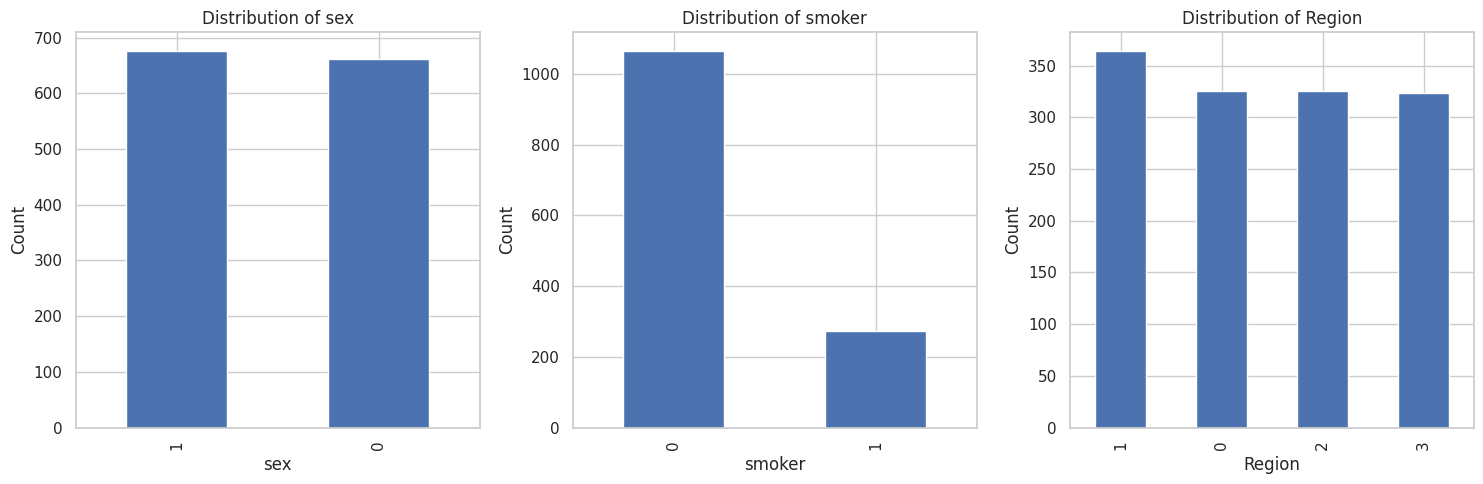

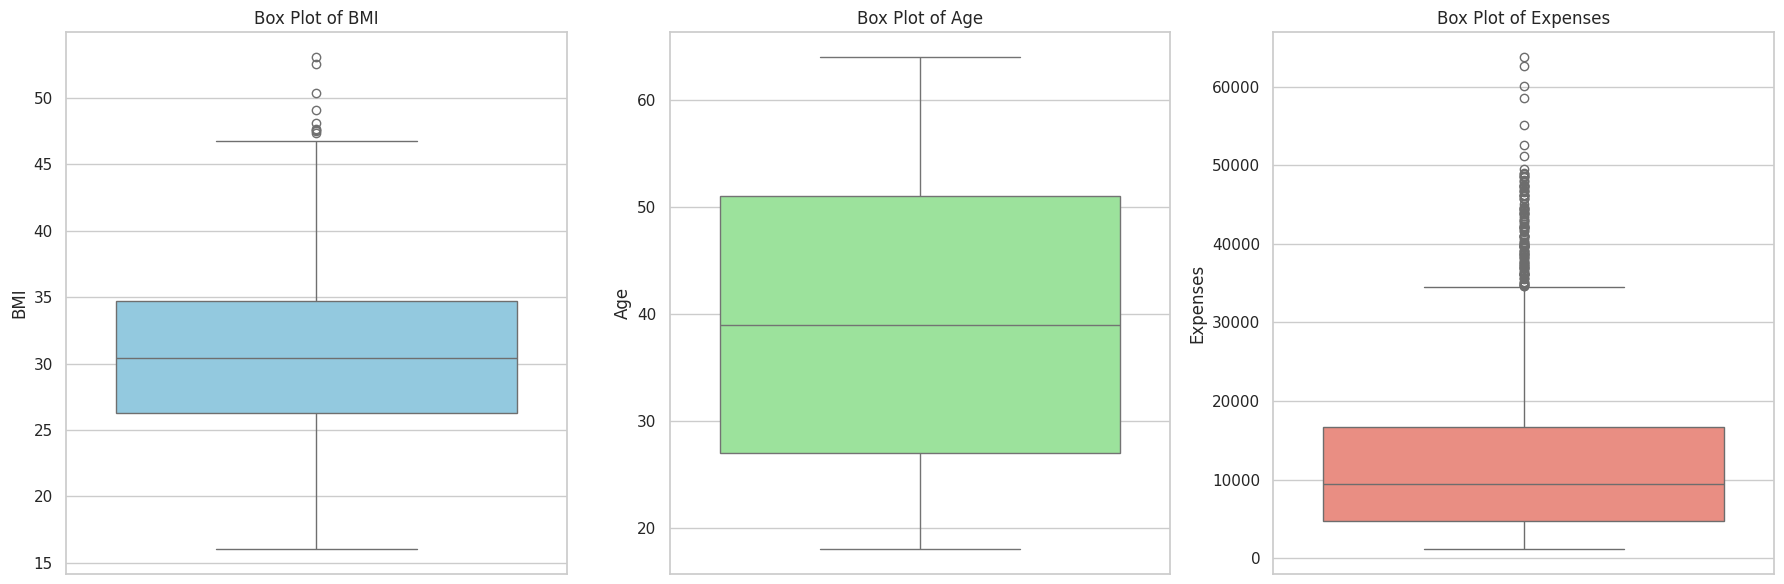

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot bar charts for the categorical variables
categorical_columns = ['sex', 'smoker', 'Region']  # Removed 'Region' as it no longer exists.

# Set up the figure for subplots
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(15, 5))

# Generate bar charts for each categorical variable
for i, column in enumerate(categorical_columns):
    data[column].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Show the plots
plt.tight_layout()
plt.show()



# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create box plots for numerical variables
plt.figure(figsize=(18, 6))

# Box plot for 'bmi'
plt.subplot(1, 3, 1)
sns.boxplot(y='bmi', data=data, color='skyblue')
plt.title('Box Plot of BMI')
plt.ylabel('BMI')

# Box plot for 'age'
plt.subplot(1, 3, 2)
sns.boxplot(y='age', data=data, color='lightgreen')
plt.title('Box Plot of Age')
plt.ylabel('Age')

# Box plot for 'expenses'
plt.subplot(1, 3, 3)
sns.boxplot(y='expenses', data=data, color='salmon')
plt.title('Box Plot of Expenses')
plt.ylabel('Expenses')

plt.tight_layout()
plt.show()



**Correlation Matrix**

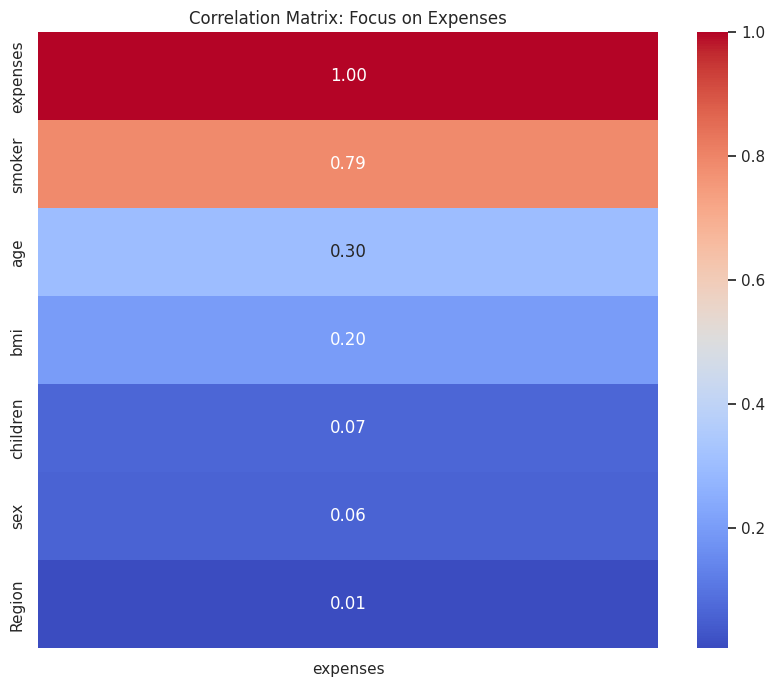

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap with a focus on 'expenses'
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['expenses']].sort_values(by='expenses', ascending=False),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Focus on Expenses')
plt.show()

**Data Cleaning**

In [ ]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
Region,0
expenses,0


**Statistical Analysis**

Descriptive Statistics

In [ ]:
# Calculate descriptive statistics for the numerical variables
descriptive_stats = {
    'Mean': data[['age', 'bmi', 'children']].mean(),
    'Median': data[['age', 'bmi', 'children']].median(),
    'Mode': data[['age', 'bmi', 'children']].mode().iloc[0],  # Mode might have multiple values; taking the first one
    'Variance': data[['age', 'bmi', 'children']].var(),
    'Standard Deviation': data[['age', 'bmi', 'children']].std()
}

# Convert the results into a DataFrame for better visualization
descriptive_stats_df = pd.DataFrame(descriptive_stats)

# Display the descriptive statistics
print("Descriptive Statistics:")
print(descriptive_stats_df)

Descriptive Statistics:
               Mean  Median  Mode    Variance  Standard Deviation
age       39.207025    39.0  18.0  197.401387           14.049960
bmi       30.665471    30.4  27.6   37.190265            6.098382
children   1.094918     1.0   0.0    1.453213            1.205493


**Correlation Coefficients to explore potential linear relationships between 'expenses' and other variables.**

In [ ]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Print correlation with 'expenses'
print("\nLinear Correlation Coefficients with 'expenses':")
print(correlation_matrix['expenses'])



Linear Correlation Coefficients with 'expenses':
age         0.299008
sex         0.057292
bmi         0.198576
children    0.067998
smoker      0.787251
Region      0.006208
expenses    1.000000
Name: expenses, dtype: float64


**Advanced Statistical Modeling**

In [ ]:
# Define the model
import statsmodels.formula.api as sm
model = sm.ols('expenses ~ age + sex + bmi + children + smoker + Region', data=data)

# Fit the model
results = model.fit()

# Print the regression results
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.2
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:36:16   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.288e+04   1013.438    -12.708      0.0

**Machine Learning Model Development**

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'expenses' is the dependent variable and the rest are independent
X = data.drop('expenses', axis=1)
y = data['expenses']


In [ ]:
# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

**Model Evaluation**

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R-squared:', r2)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

R-squared: 0.7833214205203847
Mean Squared Error: 33639075.08997808
Mean Absolute Error: 4186.940106317013


Model Improvement using Random Forest


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"R-squared (Random Forest): {r2_rf}")
print(f"Mean Squared Error (Random Forest): {mse_rf}")
print(f"Mean Absolute Error (Random Forest): {mae_rf}")


R-squared (Random Forest): 0.8629662061079595
Mean Squared Error (Random Forest): 21274322.97954768
Mean Absolute Error (Random Forest): 2534.533884067164


Saving the model in Joblib

In [ ]:
import joblib
joblib_file = "/content/drive/My Drive/Final_Engage_Project/insurance_Model5.joblib"
joblib.dump(model, joblib_file)

['/content/drive/My Drive/Final_Engage_Project/insurance_Model5.joblib']

In [ ]:
!pip install streamlit

In [ ]:
# Importing the necessary libraries
import streamlit as st
import joblib
import numpy as np

# Loading your saved model. Be sure to change the path if needed
model = joblib.load("/content/drive/MyDrive/Final_Engage_Project/insurance_Model5.joblib")

st.title('Insurance Health Expenses Prediction')
st.write("This app predicts insurance health Expenses based on demographic and health characteristics")

# Input fields
age = st.number_input('age', min_value=18.0, max_value=100.0, value=18.0)
bmi = st.number_input('bmi', min_value=18.0, max_value=100.0, value=18.0)

# Binary features using selectbox
sex = st.selectbox('sex', options=['Female', 'Male'], index=0)
children = st.number_input('children', min_value=0, max_value=6, value=0)
smoker = st.selectbox('smoker', options=['No', 'Yes'], index=0)

# Convert categorical inputs to numeric values
sex = 1 if sex == 'Male' else 0
smoker = 1 if smoker == 'Yes' else 0

# Categorical feature with options
region = st.selectbox('Region', options=['southwest', 'southeast', 'northwest', 'northeast'], index=0)

# Mapping the region to numerical value
region_mapping = {
    'southwest': 0,
    'southeast': 1,
    'northwest': 2,
    'northeast': 3
}
region_num = region_mapping[region]

# When the 'Predict' button is clicked
if st.button('Predict'):
    # Prepare input features for prediction (2D array as required by most models)
    input_features = np.array([[age, sex, bmi, children, smoker, region_num]])

    # Make prediction
    prediction = model.predict(input_features)

    # Display the prediction
    st.write(f'Predicted expenses: ${prediction[0]:.2f}')



2024-09-09 16:37:27.853 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-09 16:37:27.856 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-09 16:37:27.860 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-09 16:37:27.867 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-09 16:37:27.870 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-09 16:37:27.871 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-09 16:37:27.873 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-09 16:37:27.874 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
!npm install -g localtunnel


changed 22 packages, and audited 23 packages in 2s

3 packages are looking for funding
  run `npm fund` for details

1 moderate severity vulnerability

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.


In [ ]:
!streamlit run /content/Deploy.py &>/content/Deploy_logs.txt &

In [ ]:
!npx localtunnel --port 8501

your url is: https://neat-vans-end.loca.lt
